In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("Telco_customer_churn.csv")
df


,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,...,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No,0,45,5306,NaN
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,...,One year,Yes,Mailed check,84.80,1990.5,No,0,59,2140,NaN
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,...,One year,Yes,Credit card (automatic),103.20,7362.9,No,0,71,5560,NaN
7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,...,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,59,2793,NaN


In [39]:

print("First 5 rows :")
print(df.head())

First 5 rows :
   CustomerID  Count  Country  State  City  Zip Code  Lat Long   Latitude  \
0        2564      1        0      0   562     90003       327  33.964131   
1        6511      1        0      0   562     90005       405  34.059281   
2        6551      1        0      0   562     90006       393  34.048013   
3        5604      1        0      0   562     90010       410  34.062125   
4         174      1        0      0   562     90015       385  34.039224   

    Longitude  Gender  ...  Contract  Paperless Billing  Payment Method  \
0 -118.272783       1  ...         0                  1               3   
1 -118.307420       0  ...         0                  1               2   
2 -118.293953       0  ...         0                  1               2   
3 -118.315709       0  ...         0                  1               2   
4 -118.266293       1  ...         0                  1               0   

   Monthly Charges  Total Charges  Churn Label  Churn Value  Churn Scor

In [6]:

categorical_cols = df.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le



In [30]:

if 'Churn Label' in df.columns:
    X = df.drop('Churn Label', axis=1)
    y = df['Churn Label']
    print(f"X shape: {X.shape}, y shape: {y.shape}")
else:
    print("Column 'Churn' not found. Available columns:", df.columns.tolist())


X shape: (7043, 32), y shape: (7043,)


In [8]:

X = df.drop('Churn Label', axis=1)
y = df['Churn Label']


In [9]:

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

In [10]:

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [31]:

model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [32]:

y_pred = model.predict(X_test)


print("\nModel Evaluation Results:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


cm = confusion_matrix(y_test, y_pred)





Model Evaluation Results:
Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1009
           1       1.00      1.00      1.00       400

    accuracy                           1.00      1409
   macro avg       1.00      1.00      1.00      1409
weighted avg       1.00      1.00      1.00      1409



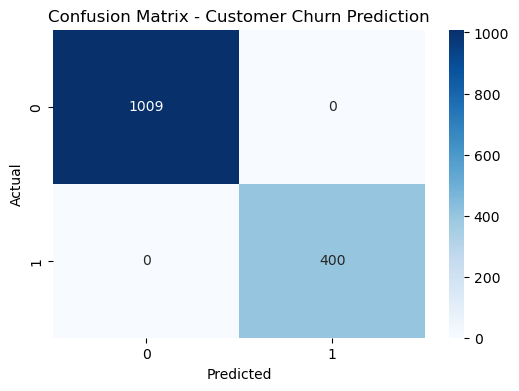

In [33]:

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Customer Churn Prediction")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

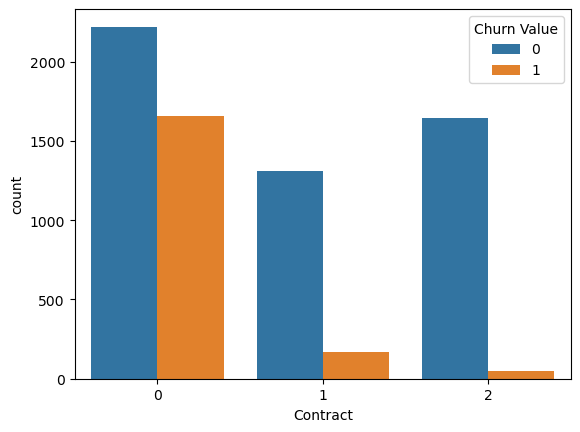

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Contract', hue='Churn Value', data=df)
plt.show()


In [40]:
from sklearn.ensemble import RandomForestClassifier 
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

import pandas as pd

importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(importance.head(10))


             Feature  Importance
28       Churn Value    0.440734
31      Churn Reason    0.317830
29       Churn Score    0.143120
23          Contract    0.023779
17   Online Security    0.015846
13     Tenure Months    0.013482
20      Tech Support    0.009374
12        Dependents    0.005800
26   Monthly Charges    0.004683
16  Internet Service    0.004363


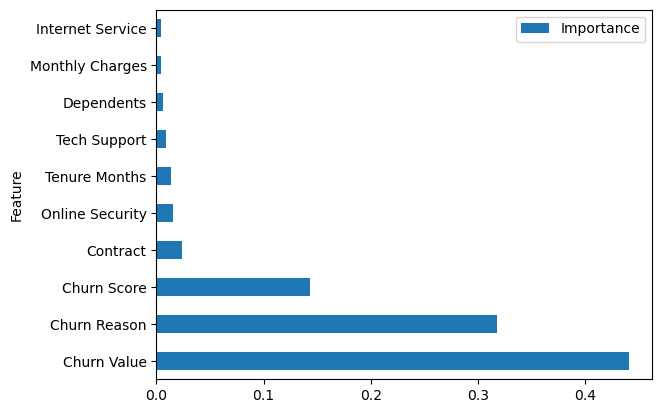

In [38]:
import matplotlib.pyplot as plt

importance.head(10).plot(kind='barh', x='Feature', y='Importance')
plt.show()


In [19]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

print(coefficients)


              Feature  Coefficient
28        Churn Value     4.640155
29        Churn Score     1.106609
26    Monthly Charges     0.197301
24  Paperless Billing     0.094520
15     Multiple Lines     0.067915
11            Partner     0.036763
25     Payment Method     0.035933
30               CLTV     0.032617
4                City     0.026053
19  Device Protection     0.025413
10     Senior Citizen     0.023959
27      Total Charges     0.017243
0          CustomerID     0.016199
9              Gender     0.015018
6            Lat Long     0.013972
7            Latitude     0.011047
22   Streaming Movies     0.008747
1               Count     0.000000
3               State     0.000000
2             Country     0.000000
16   Internet Service    -0.009984
21       Streaming TV    -0.012885
14      Phone Service    -0.014332
8           Longitude    -0.015674
5            Zip Code    -0.028715
18      Online Backup    -0.032583
20       Tech Support    -0.111217
17    Online Securit

In [35]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 1.0


['churn_model.pkl']

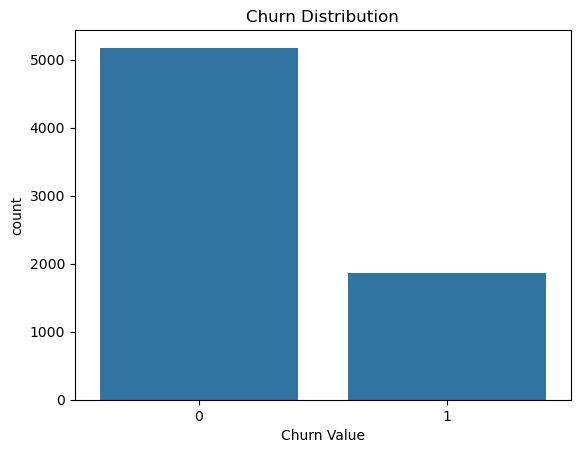

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Churn Value', data=df)
plt.title("Churn Distribution")
plt.show()


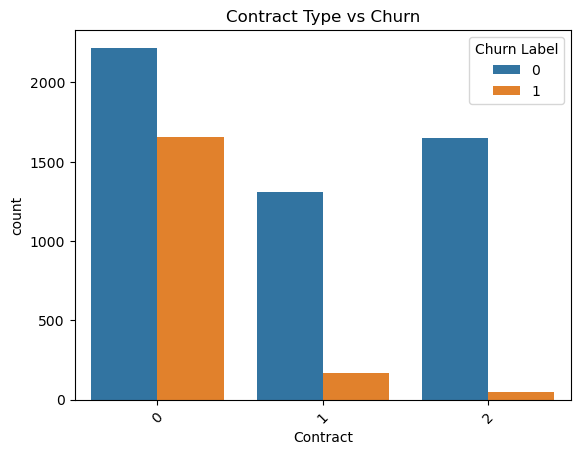

In [27]:
sns.countplot(x='Contract', hue='Churn Label', data=df)
plt.xticks(rotation=45)
plt.title("Contract Type vs Churn")
plt.show()


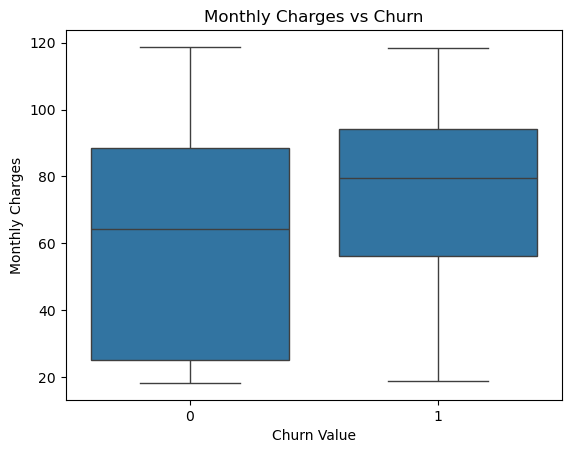

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='Churn Value', y='Monthly Charges', data=df)
plt.title("Monthly Charges vs Churn")
plt.show()


In [ ]:
import joblib
joblib.dump(model, 'churn_model.pkl')


In [ ]:

from flask import Flask, request, jsonify
import joblib

app = Flask(__name__)
model = joblib.load('churn_model.pkl')

@app.route('/predict', methods=['POST'])
def predict():
    data = request.json
    prediction = model.predict([data])
    return jsonify({'churn_prediction': int(prediction[0])})
